Wartości własne (λ):
[1.+0.j 1.+0.j 1.-0.j]

Amplitudy początkowe (b):
[-3.73278720e+24-5.36870912e+08j  1.42048989e+24-2.09388303e+24j
  1.42048989e+24+2.09388303e+24j]


C:\Users\dawid\AppData\Local\Temp\ipykernel_13080\466860023.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_full      = pd.read_csv('War1_X.csv',      sep=';', header=None).applymap(to_float)
C:\Users\dawid\AppData\Local\Temp\ipykernel_13080\466860023.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Xprime_full = pd.read_csv('War1_Xprime.csv', sep=';', header=None).applymap(to_float)


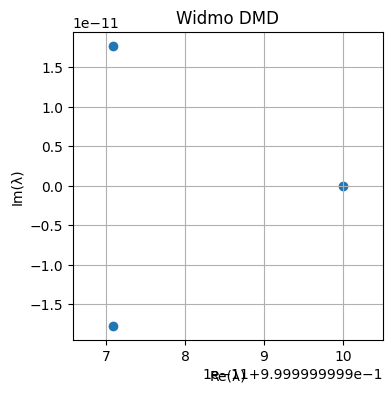

      0     1     2     3     4     5     6     7     8     9   ...    13  \
0   0.50  0.16  0.13 -0.12 -0.08  0.06  0.37 -0.03  0.02  0.09  ...  0.05   
1   0.16  0.51  0.05 -0.01  0.10 -0.05  0.09  0.11  0.01 -0.15  ... -0.24   
2   0.13  0.05  0.43  0.03  0.14  0.02 -0.05  0.10  0.09  0.13  ... -0.00   
3  -0.12 -0.01  0.03  0.17  0.04 -0.06 -0.04  0.07  0.07  0.04  ... -0.01   
4  -0.08  0.10  0.14  0.04  0.28  0.04 -0.12  0.10  0.10  0.04  ...  0.02   
5   0.06 -0.05  0.02 -0.06  0.04  0.36  0.10  0.02  0.11 -0.02  ...  0.04   
6   0.37  0.09 -0.05 -0.04 -0.12  0.10  0.41 -0.01  0.08  0.07  ...  0.06   
7  -0.03  0.11  0.10  0.07  0.10  0.02 -0.01  0.41  0.15  0.12  ... -0.05   
8   0.02  0.01  0.09  0.07  0.10  0.11  0.08  0.15  0.39 -0.08  ... -0.03   
9   0.09 -0.15  0.13  0.04  0.04 -0.02  0.07  0.12 -0.08  0.39  ...  0.21   
10  0.06 -0.03 -0.04  0.13 -0.17 -0.19  0.09 -0.11 -0.08 -0.04  ...  0.09   
11 -0.06 -0.14  0.13  0.11  0.00  0.18  0.00 -0.13  0.20 -0.14  ...  0.01   

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def to_float(x):
    return float(str(x).replace(',', '.'))
X_full      = pd.read_csv('War1_X.csv',      sep=';', header=None).applymap(to_float)
Xprime_full = pd.read_csv('War1_Xprime.csv', sep=';', header=None).applymap(to_float)

X      = X_full.iloc[:, 1:].to_numpy()
Xprime = Xprime_full.iloc[:, :-1].to_numpy()

def dmd_ss(X, Xprime, r):
    """
    Dynamic Mode Decomposition – Snapshot Sequence (truncation rank = r)
    X      : n × m-1   (snapshots 1 … m-1)
    Xprime : n × m-1   (snapshots 2 … m)
    returns Φ (n×r), Λ (r diag), b (r×1)
    """
    U, s, Vt = np.linalg.svd(X, full_matrices=False)   # SVD
    Ur   = U[:, :r]
    Sr   = np.diag(s[:r])
    Vtr  = Vt[:r, :]

    A_tilde = Ur.T @ Xprime @ Vtr.T @ np.linalg.inv(Sr)
    eigvals, W = np.linalg.eig(A_tilde)
    Lambda = np.diag(eigvals)
    Phi = Xprime @ Vtr.T @ np.linalg.inv(Sr) @ W       # tryby DMD

    # amplitudy początkowe (dla 1-go snapshotu)
    alpha1 = Sr @ Vtr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)

    return Phi, Lambda, b

r = 5
Phi, Lambda, b = dmd_ss(X, Xprime, r)

print("Wartości własne (λ):")
print(np.round(np.diag(Lambda), 6))

print("\nAmplitudy początkowe (b):")
print(np.round(b, 6))

plt.figure(figsize=(4,4))
plt.scatter(np.real(np.diag(Lambda)), np.imag(np.diag(Lambda)))
plt.xlabel('Re(λ)'); plt.ylabel('Im(λ)')
plt.title('Widmo DMD'); plt.grid(True); plt.axis('equal')
plt.show()

A = Xprime @ np.linalg.pinv(X)
A_df = pd.DataFrame(A).round(2)  
print(A_df)
